# 추론

# Kolmogorov_Smirnov 검증

In [1]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [2]:
import findspark
findspark.init()
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [3]:
xRdd = spark.sparkContext.parallelize([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5])

In [5]:
from scipy.stats import kstest

In [6]:
s = [1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5]
d = [11.0, 12.0, 15.0, 14.0, 13.0, 13.3, 15.5]
kstest(s, d)

KstestResult(statistic=1.0, pvalue=0.0005827505827505828)

In [7]:
import statsmodels.api as sm

moore=sm.datasets.get_rdataset("Moore","carData")

In [8]:
moore.data.head()

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [18]:

moore.data.columns=['status','conformity', 'fcategory', 'fscore']
moore.data.columns
moore.data.head()

,status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [11]:

from statsmodels.formula.api import ols

formula='fscore~C(status)*C(fcategory)'
model=ols(formula, data=moore.data).fit()

In [12]:
from statsmodels.stats.anova import anova_lm

result = anova_lm(model)

In [13]:
result

,df,sum_sq,mean_sq,F,PR(>F)
C(status),1.0,7.932587,7.932587,0.231555,6.330623e-01
C(fcategory),2.0,7561.365635,3780.682818,110.359336,8.768957e-17
C(status):C(fcategory),2.0,29.086807,14.543403,0.424527,6.570656e-01
Residual,39.0,1336.059416,34.257934,NaN,NaN


In [14]:
moorePd = moore.data

In [15]:
moorePd.groupby('fcategory').mean()

,conformity,fscore
fcategory,,
high,12.266667,58.533333
low,11.733333,26.933333
medium,12.400000,43.866667


In [16]:
moorePd.groupby('fcategory').mean()

,conformity,fscore
fcategory,,
high,12.266667,58.533333
low,11.733333,26.933333
medium,12.400000,43.866667


<AxesSubplot:>

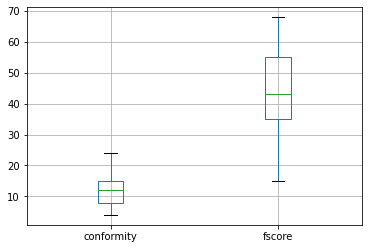

In [17]:
moorePd.boxplot()